# Using the Waarts four-branch serial system


## References

* Waarts, P.-H. (2000). Structural reliability using finite element 
methods: an appraisal of DARS: Directional Adaptive Response Surface 
Sampling. Ph. D. thesis, Technical University of Delft, The Netherlands. 
Pages 58, 69, 160. 

* Thèse Vincent Dubourg 2011, Méta-modèles adaptatifs pour l’analyse 
de fiabilité et l’optimisation sous contrainte fiabiliste, 
section "A two-dimensional four-branch serial system", page 182


In [1]:
import openturns as ot
import numpy as np
import otbenchmark as otb

In [2]:
problem = otb.FourBranchSerialSystemReliability()

In [3]:
event = problem.getEvent()
g = event.getFunction()

In [4]:
inputVector = event.getAntecedent()
distribution = inputVector.getDistribution()

## Draw isolines

In [5]:
lowerBound = ot.Point([-5.0, -5.0])
upperBound = ot.Point([5.0, 5.0])

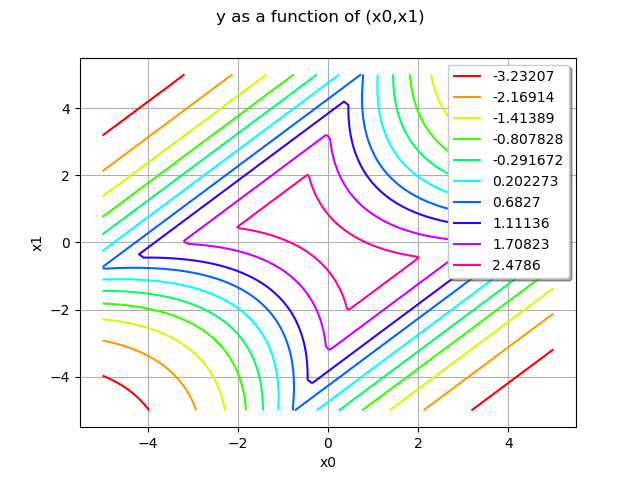

In [6]:
nbPoints = [100, 100]
g.draw(lowerBound, upperBound, nbPoints)

In [7]:
sampleSize = 500
sampleInput = inputVector.getSample(sampleSize)
sampleOutput = g(sampleInput)

In [8]:
drawEvent = otb.DrawEvent(event)

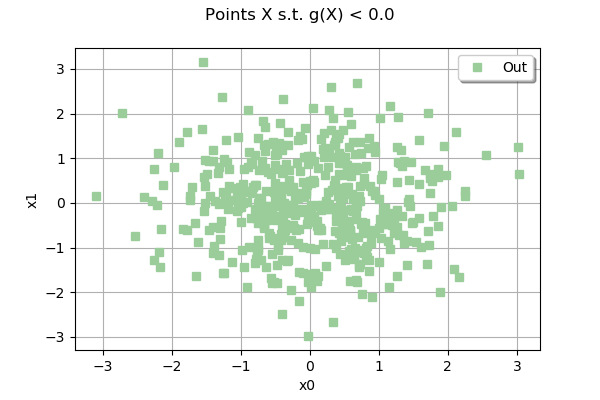

In [9]:
cloud = drawEvent.drawSample(sampleInput, sampleOutput)
cloud

## Draw the limit state surface

In [10]:
bounds = ot.Interval(lowerBound, upperBound)
bounds

class=Interval name=Unnamed dimension=2 lower bound=class=Point name=Unnamed dimension=2 values=[-5,-5] upper bound=class=Point name=Unnamed dimension=2 values=[5,5] finite lower bound=[1,1] finite upper bound=[1,1]

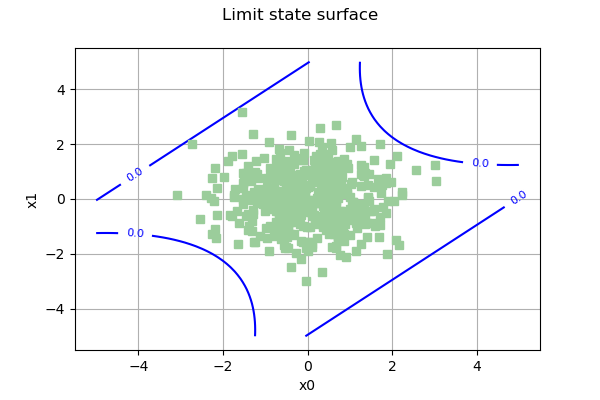

In [11]:
nX = 75
nY = 75
graph = drawEvent.drawLimitState(bounds, nX, nY)
graph.add(cloud)
graph

## Fill the event domain with a color

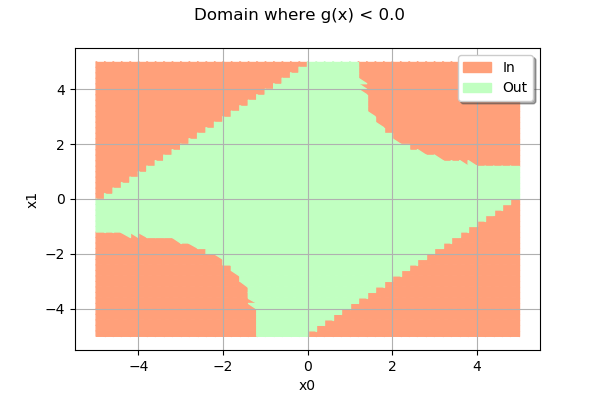

In [12]:
drawEvent.fillEvent(bounds)